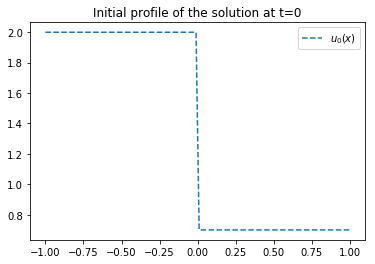

In [826]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi


a=-1
b=1

def u0(x,ul,ur):
    return np.piecewise(x, [x < 0, x >= 0], [lambda x: ul, lambda x: ur])


def uexact(x,t,ul,ur):
    s=(ur+ul)/2
    return np.piecewise(x, [x < s*t, x >= s*t], [lambda x: ul, lambda x: ur])



def shock_speed_compute(u):
    du=np.diff(u)
    shock_indexes=np.where(du !=0 )
    #print(shock_indexes)
    il= shock_indexes[0][0]#index left of the shock
    ir= shock_indexes[0][-1]
    if (il==ir): #to fix. IF DU==O EVERYWHERE, THEN SET V=0
        v=0
    else:
        v=(0.5*u[il]**2 - 0.5*u[ir]**2)/(u[il]-u[ir])
        
    return v




x=np.linspace(a,b,100)
plt.plot(x,u0(x,2,0.7),'--',label='$u_0(x)$')
plt.title('Initial profile of the solution at t=0')
plt.legend()
plt.show()

In [827]:
def noncon_upwind(dx,dt,tf,ul,ur):
    nx=int(np.floor((b-a)/dx))
    x=np.linspace(a,b,nx+1)
    u=u0(x,ul,ur) #size N+1
    t=0
    while (t<tf):
        dt=np.min([dt,tf-dt])
        un=u.copy()
        
        for i in range(1,nx+1):#from x_1 to x_N
            u[i]=un[i]-(dt/dx)*un[i]*(un[i]-un[i-1])
        u[0]=u[1]
        t=t+dt
    return u


def conservative_upwind(dx,dt,tf,ul,ur):
    nx=int(np.floor((b-a)/dx))
    x=np.linspace(a,b,nx+1)
    u=u0(x,ul,ur) #size N+1
    t=0
    while (t<tf):
        dt=np.min([dt,tf-dt])
        un=u.copy()
        for i in range(1,nx+1):#from x_1 to x_N
            u[i]=un[i]-(dt/dx)*0.5*(un[i]**2-un[i-1]**2)
        u[0]=u[1]
        t=t+dt
    return u

nx=200
dx=(b-a)/nx
dt=0.5*dx
tf=1
ul=1.2
ur=0.4
ShockSpeed=(ul+ur)/2

x=np.linspace(a,b,nx+1)
unc=noncon_upwind(dx,dt,tf,ul,ur)
ucon=conservative_upwind(dx,dt,tf,ul,ur)

Computation of shock velocities

In [828]:
def shock_speed(u0,unc,ucon,x,ul,ur):
    #Non Conservative scheme velocity
    pos0=np.where(u0(x,ul,ur)==ur)[0][0]
    if (len(np.where(abs(unc-ur)<1e-1))>0):
        fpos=np.where(abs(unc-ur)<1e-1)[0][0]
        speedNC=(x[fpos]-x[pos0])/(tf)

    #print('Shock speed Non Conservative= ', speedNC)

    #Conservative scheme velocity
    if (len(np.where(abs(ucon-ur)<1e-1))>0):
        fpos=np.where(abs(ucon-ur)<1e-1)[0][0]
        speedCON=(x[fpos]-x[pos0])/(tf)
    #print('Shock speed conservative= ', speedCON)
    return speedNC, speedCON
    

vnc,vcon=shock_speed(u0,unc,ucon,x,ul,ur)
print('Analytical shock speed',ShockSpeed)
print('Non Cons shock speed',vnc)
print('Cons shock speed',vcon)

Analytical shock speed 0.8
Non Cons shock speed 0.7
Cons shock speed 0.81


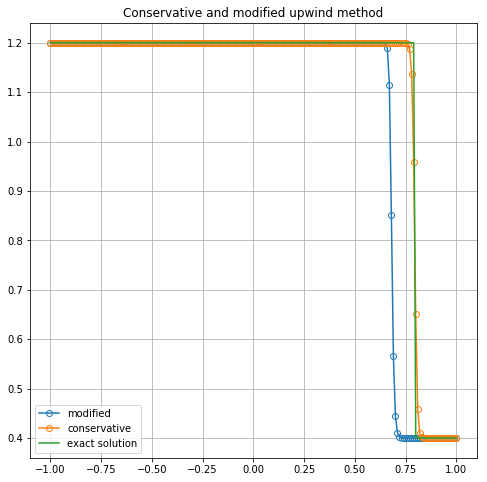

In [829]:
#plots
plt.figure(figsize=(8,8))
plt.plot(x,unc,'-o',markerfacecolor='none',label='modified')
plt.plot(x,ucon,'-o',markerfacecolor='none',label='conservative')
plt.plot(x,uexact(x,tf,ul,ur),label='exact solution')
plt.legend()
plt.grid()
plt.title('Conservative and modified upwind method')
plt.show()

In [830]:
hrange=1/(2**np.arange(3,12))

errNC=[]
errCON=[]
speedsNC=[]
speedsCON=[] 
for dx in hrange:
    dt=0.5*dx
    nx=np.floor((b-a)/dx).astype(int)
    x=np.linspace(a,b,nx+1)
    
    unc=noncon_upwind(dx,dt,tf,ul,ur)
    ucon=conservative_upwind(dx,dt,tf,ul,ur) #compute solutions
    
    spNC=shock_speed(u0,unc,ucon,x,ul,ur)[0] #compute shock speeds 
    spCON=shock_speed(u0,unc,ucon,x,ul,ur)[1]
    
    speedsNC.append(spNC) #store numerical shock velocities for each h
    speedsCON.append(spCON)
    
    errNC.append(abs(spNC- ShockSpeed)/abs(ShockSpeed)) #compute relative error
    errCON.append(abs(spCON-ShockSpeed)/abs(ShockSpeed))



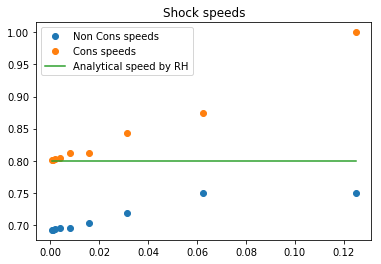

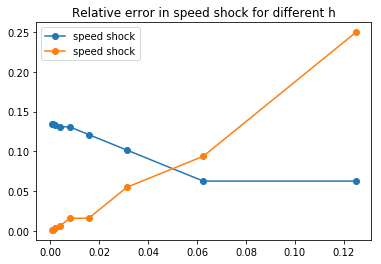

In [831]:
plt.figure()
plt.plot(hrange,speedsNC,'o',label='Non Cons speeds')
plt.plot(hrange,speedsCON,'o',label='Cons speeds')
plt.plot((min(hrange), max(hrange)), (ShockSpeed, ShockSpeed), '-',label='Analytical speed by RH')
plt.legend()
plt.title('Shock speeds')
plt.show()

plt.figure()
plt.plot(hrange,errNC,'-o',label='speed shock')
plt.plot(hrange,errCON,'-o',label='speed shock')
plt.legend()
plt.title('Relative error in speed shock for different h')
plt.show()